In [18]:
import os, sys, fitsio
sys.path.append('../')
import numpy as np
import healpy as hp
from run_DMASS import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import healpy as hp

In [80]:
rootdir = '../output/validate_NEST/'
#rootdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5_baomask//'
figoutdir = rootdir + '/figure/'
os.system('mkdir '+figoutdir)

0

In [5]:
#import pickle
#filename = open('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/gold_st82_XD_no_full_tol1e5.pkl')
#pic = pickle.load(filename)

In [104]:
# import DMASS

#dmass = fitsio.read(rootdir+'spt.fits')
#rootdir = '../output/validate_RING/'
dmass_st82_even = io.SearchAndCallFits(path = rootdir, keyword='dmass_st82_NEST_even.fits')
dmass_st82_odd = io.SearchAndCallFits(path = rootdir, keyword='dmass_st82_NEST_odd.fits')
dmass_st82_test_odd = io.SearchAndCallFits(path = rootdir, keyword='dmass_st82_NEST_test_odd.fits')
dmass_st82_even = Cuts.keepGoodRegion(dmass_st82_even)
dmass_st82_odd = Cuts.keepGoodRegion(dmass_st82_odd)

dmassdir = '../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/'
dmass_st82 = io.SearchAndCallFits(path = dmassdir, keyword='gold_st82_prob.fits')
#dmass = fitsio.read(rootdir+'dmass_spt_sys_v3.fits')

#dmass_st82 = dmass_st82[dmass_st82['EachProb_CMASS'] > 0.01]
#dmass_st82_even = dmass_st82_even[dmass_st82_even['CMASS_PROB'] > 0.01]
#dmass_st82_odd = dmass_st82_odd[dmass_st82_odd['CMASS_PROB'] > 0.01]

print 'dmass sample size :', np.sum(dmass_st82_even['CMASS_PROB']), np.sum(dmass_st82_odd['CMASS_PROB']), np.sum(dmass_st82['EachProb_CMASS'])


#cmass = fitsio.read('../output/sfd_train_photo_SamPle_nozband_ran10_3_full_tol1e5/train_sample_des.fits')
#cmass = Cuts.keepGoodRegion(cmass)
#healConfig={}
#healConfig['out_nside'] = 64
#cmass = HealPixifyCatalogs(catalog=cmass, healConfig=healConfig, ratag='RA', dectag = 'DEC')

#evenmask = cmass['HEALIndex']%2 == 0
#cmass_even = cmass[evenmask]
#cmass_odd = cmass[~evenmask]

cmass_even = esutil.io.read(rootdir+'train_NEST_even.fits')
cmass_odd = esutil.io.read(rootdir+'train_NEST_odd.fits')
cmass = esutil.io.read(dmassdir+'train_sample_des.fits')
print 'cmass sample size :', cmass_even.size, cmass_odd.size, cmass.size

#dmass = appendColumn(dmass, name = 'WEIGHT', value = dmass['EachProb_CMASS'], dtypes=float)
#dmass_st82 = appendColumn(dmass_st82, name = 'WEIGHT', value = dmass_st82['EachProb_CMASS'], dtypes=float)

#print 'dmass st82 sample size :', np.sum(dmass_st82['CMASS_PROB'])
#print 'cmass sample size :', cmass.size


--------------------------------
 calling catalog
--------------------------------
dmass_st82_NEST_even.fits

--------------------------------
 calling catalog
--------------------------------
dmass_st82_NEST_odd.fits

--------------------------------
 calling catalog
--------------------------------
dmass_st82_NEST_test_odd.fits

--------------------------------
 calling catalog
--------------------------------
gold_st82_prob.fits
dmass sample size : 6500.3101352636795 6489.556470786066 13002.574050557929
cmass sample size : 6325 6314 12639


In [ ]:
#random = io.SearchAndCallFits(path = rootdir, keyword='random_x50_dmass_spt_masked.fits')

In [92]:
# calling map 
GoldMask = callingEliGoldMask()
#GoldMask = callingY1GoldMask( nside = 4096 )
#GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_st82 = GoldMask[ GoldMask['DEC'] > -3.0 ]
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]
#GoldMask_spt = cutcat20(GoldMask_spt)
#GoldMask_spt = Cuts.SpatialCuts(GoldMask_spt, ra=0, ra2 = 100, dec=-52, dec2 = -48)

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = np.sum(GoldMask_spt['FRAC']) #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  np.sum(GoldMask_st82['FRAC']) # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

In [93]:

random = uniform_random_on_sphere(GoldMask_st82, size = 200 * cmass.size)
random = Cuts.keepGoodRegion(random)
#rand = Cuts.keepY1GoldRegion(rand)
#rand = random[ random['DEC'] < -3.0 ]
rand_st82 = random[ random['DEC'] > -3.0 ]

healConfig={'out_nside':64, 'nest':True}
rand_st82 = HealPixifyCatalogs(catalog=rand_st82, healConfig=healConfig, ratag='RA', dectag = 'DEC')

evenmask = rand_st82['HEALIndex']%2 == 0
rand_st82_even = rand_st82[evenmask]
rand_st82_odd = rand_st82[~evenmask]

print rand_st82_even.size, rand_st82_odd.size


102396 101947


In [105]:

#train_sample = esutil.io.read('../output/sfd_train_photo_SamPle_nozband_ran10_3/cmass_in_st82.fits')

mg1, mg2, _ = esutil.htm.HTM(10).match(cmass['RA'], cmass['DEC'], dmass_st82['RA'], \
                                     dmass_st82['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des, nocmass = dmass_st82[cmass_mask], dmass_st82[~cmass_mask]

mg1, mg2, _ = esutil.htm.HTM(10).match(cmass_even['RA'], cmass_even['DEC'], dmass_st82_even['RA'], \
                                     dmass_st82_even['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82_even.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des_even, nocmass_even = dmass_st82_even[cmass_mask], dmass_st82_even[~cmass_mask]


mg1, mg2, _ = esutil.htm.HTM(10).match(cmass_odd['RA'], cmass_odd['DEC'], dmass_st82_odd['RA'], \
                                     dmass_st82_odd['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82_odd.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des_odd, nocmass_odd = dmass_st82_odd[cmass_mask], dmass_st82_odd[~cmass_mask]


mg1, mg2, _ = esutil.htm.HTM(10).match(cmass_odd['RA'], cmass_odd['DEC'], dmass_st82_test_odd['RA'], \
                                     dmass_st82_test_odd['DEC'],2./3600, maxmatch=1)
cmass_mask = np.zeros(dmass_st82_test_odd.size, dtype=bool)
cmass_mask[mg2] = 1
clean_cmass_data_des_test_odd, nocmass_odd = dmass_st82_test_odd[cmass_mask], dmass_st82_test_odd[~cmass_mask]

In [106]:
pbinsmall, steps = np.linspace(0, 0.02, 21,retstep=1 )
pbinbig, stepb = np.linspace(0.02, 1, 197, retstep=1 )
pth_bin = np.hstack([pbinsmall, pbinbig[1:]])
pcenters = pbinsmall[:-1] + steps/2.
pcenterb = pbinbig[:-1] + stepb/2.
pcenter = np.hstack([pcenters, pcenterb[1:]])

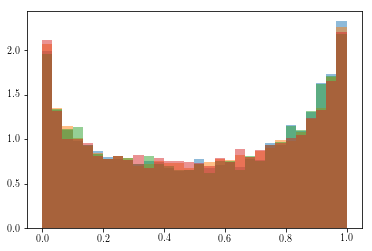

In [102]:

pbin = np.linspace(0,1,31)

fig, ax = plt.subplots()
_ = ax.hist( dmass_st82_even['CMASS_PROB'], bins = pbin, 
            normed=True, alpha= 0.5, weights = dmass_st82_even['CMASS_PROB'] )
_ = ax.hist( dmass_st82_odd['CMASS_PROB'], bins = pbin, 
           normed=True, alpha= 0.5, weights = dmass_st82_odd['CMASS_PROB'] )
#_ = ax.hist( dmass_st82['CMASS_PROB'], bins = pbin, 
#           normed=True, alpha= 0.5, weights = dmass_st82['CMASS_PROB'] )
_ = ax.hist( clean_cmass_data_des_even['CMASS_PROB'], bins = pbin, normed=True, alpha= 0.5 )
_ = ax.hist( clean_cmass_data_des_odd['CMASS_PROB'], bins = pbin, normed=True, alpha= 0.5 )

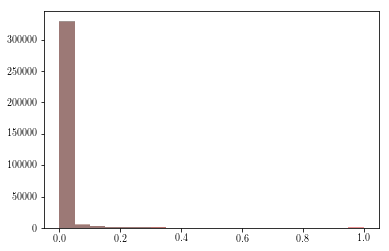

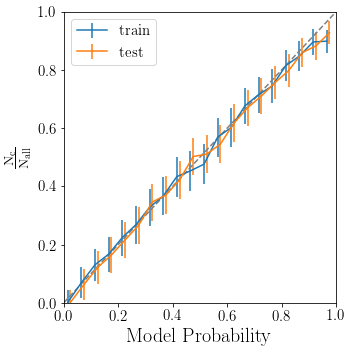

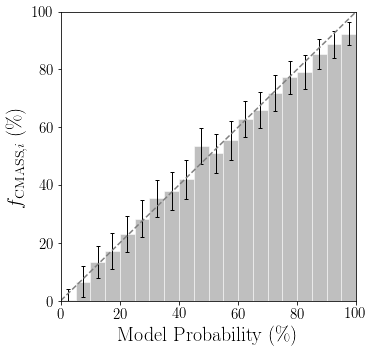

In [245]:

pbin, ps = np.linspace(0,1,21, retstep=True)

#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax = plt.subplots()
_ = ax.hist( dmass_st82_even['CMASS_PROB'], bins = pbin, 
            normed=True, alpha= 0.5, weights = dmass_st82_even['CMASS_PROB'] )
_ = ax.hist( dmass_st82_odd['CMASS_PROB'], bins = pbin, 
           normed=True, alpha= 0.5, weights = dmass_st82_odd['CMASS_PROB'] )
#_ = ax.hist( dmass_st82['CMASS_PROB'], bins = pbin, 
#           normed=True, alpha= 0.5, weights = dmass_st82['CMASS_PROB'] )
#_ = ax.hist( clean_cmass_data_des_even['CMASS_PROB'], bins = pbin, normed=True, alpha= 0.5 )
N_cmass_even, _, _ = ax.hist( clean_cmass_data_des_even['CMASS_PROB'], bins = pbin, normed=False, alpha= 0.5 )
N_all_even, _, _ = ax.hist( dmass_st82_even['CMASS_PROB'], bins = pbin, 
            normed=False, alpha= 0.5 )

N_cmass_odd, _, _ = ax.hist( clean_cmass_data_des_odd['CMASS_PROB'], bins = pbin, normed=False, alpha= 0.5 )
N_all_odd, _, _ = ax.hist( dmass_st82_odd['CMASS_PROB'], bins = pbin, 
            normed=False, alpha= 0.5 )

N_cmass_test_odd, _, _ = ax.hist( clean_cmass_data_des_test_odd['CMASS_PROB'], bins = pbin, normed=False, alpha= 0.5 )
N_all_test_odd, _, _ = ax.hist( dmass_st82_test_odd['CMASS_PROB'], bins = pbin, 
            normed=False, alpha= 0.5 )

#N_cmass, _, _ = ax.hist( clean_cmass_data_des['CMASS_PROB'], bins = pbin, normed=False, alpha= 0.5 )
#N_all, _, _ = ax.hist( dmass_st82['CMASS_PROB'], bins = pbin, 
#            normed=False, alpha= 0.5 )

fig, ax = plt.subplots(figsize = (5,5))
#ax.plot(pbin[:-1]+ps/2., N_cmass*1./N_all )
ax.errorbar(pbin[:-1]+ps/2.-0.01 , N_cmass_even*1./N_all_even, yerr = 1./np.sqrt(N_cmass_even), fmt='', label='train'  )
ax.errorbar(pbin[:-1]+ps/2., N_cmass_odd*1./N_all_odd, yerr = 1./np.sqrt(N_cmass_odd),fmt='', label='test' )
#ax.errorbar(pbin[:-1]+ps/2., N_cmass*1./N_all, yerr = 1./np.sqrt(N_cmass), label='full' )
ax.plot([0,1], [0,1], ls='--', color='grey')
ax.set_ylim(0,1)
ax.set_xlim(0,1)

ax.set_xlabel(r'${\rm Model~Probability}$', fontsize = 20)
ax.set_ylabel(r'$\frac{\rm N_{c}}{\rm N_{all}}$', fontsize = 20)
ax.tick_params(axis='both', labelsize = 15)
ax.legend(loc='best', fontsize=15)
fig.tight_layout()
#fig.savefig('../paper_figure/test.pdf')




#===============================================

fig, ax = plt.subplots(figsize = (5.3,5))
#ax.plot(pbin[:-1]+ps/2., N_cmass*1./N_all )
#ax.errorbar(pbin[:-1]+ps/2.-0.01 , N_cmass_even*1./N_all_even, yerr = 1./np.sqrt(N_cmass_even), fmt='', label='train'  )
#ax.errorbar( (pbin[:-1]+ps/2. ) , N_cmass_test_odd*1./N_all_test_odd , 
#            yerr = 1./np.sqrt(N_cmass_test_odd), fmt='', label='test' )

ax.bar((pbin[:-1]+ps/2. ), N_cmass_test_odd*1./N_all_test_odd , 0.05, edgecolor='w',
        color='grey', yerr = 1./np.sqrt(N_cmass_test_odd), 
        alpha = 0.5, label = 'test', error_kw = {'elinewidth':1, 'capsize':2.4} )
                #yerr=std_men, error_kw=error_config,
                #label='Men')

#ax.errorbar(pbin[:-1]+ps/2., N_cmass*1./N_all, yerr = 1./np.sqrt(N_cmass), label='full' )

#ax.set_xticks([])
#ax.set_yticks([])
ax.set_xticklabels([0,20,40,60,80,100])
ax.set_yticklabels([0,20,40,60,80,100])

ax.plot([0,1], [0,1], ls='--', color='grey')
ax.set_ylim(0,1)
ax.set_xlim(0,1)

ax.set_xlabel(r'{\rm Model Probability (\%)}', fontsize = 20)
ax.set_ylabel(r'$f_{ {\rm CMASS},i}~(\%)$', fontsize = 20)
ax.tick_params(axis='both', labelsize = 15)
#ax.legend(loc='best', fontsize=15)
fig.tight_layout()
#fig.savefig('../paper_figure/model_probability.pdf')



DAT = np.column_stack(( (pbin[:-1]+ps/2.) * 100, N_cmass_test_odd*1./N_all_test_odd * 100
                       ,1./np.sqrt(N_cmass_test_odd) * 100  ))
np.savetxt('../paper_figure/model_probability.txt', DAT, header = 'prob bin center, fraction,  err')


0.0 6500.3101352636795 6489.556470786066
0.001 6471.304426140013 6459.317647015702
0.002 6449.407429675187 6436.92859226472
0.003 6429.272973727159 6417.233715731059
0.004 6410.5245883957205 6398.854196865046
0.005 6393.24167890549 6381.608760130306
0.006 6376.879970771096 6365.328496205019
0.007 6361.324166139573 6349.255673132629
0.008 6346.298736932327 6334.356823858945
0.009000000000000001 6332.50554001424 6319.321559719798
0.01 6319.672261747244 6305.688980550483
0.011 6305.484087479673 6292.606588264451
0.012 6292.745583081872 6279.219359321055
0.013000000000000001 6280.33806285336 6266.022586728196
0.014 6267.856858106896 6252.922440200875
0.015 6256.372576752469 6240.25792891981


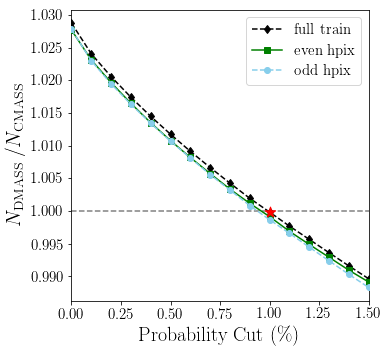

In [244]:
cmass_numdensity_even = cmass_even.size# * 1./rand_st82_even.size
cmass_numdensity_odd = cmass_odd.size# * 1./rand_st82_odd.size
cmass_numdensity = cmass.size# * 1./rand_st82.size

fig, ax = plt.subplots(figsize = (5.5,5))

numdensity = np.zeros(pth_bin[:16].size)
numdensity_even = np.zeros(pth_bin[:16].size)
numdensity_odd = np.zeros(pth_bin[:16].size)

i=0
for pc in pth_bin[:16] :
    #print i,
    
    #dmass_spt_pc, _ = resampleWithPth( gold_spt_prob_ran, pstart = pc)
    dc = dmass_st82[dmass_st82['EachProb_CMASS'] > pc] 
    dc_even = dmass_st82_even[dmass_st82_even['CMASS_PROB'] > pc] 
    dc_odd = dmass_st82_odd[dmass_st82_odd['CMASS_PROB'] > pc] 
    weight = np.sum(dc['EachProb_CMASS'] )
    weight_even = np.sum(dc_even['CMASS_PROB'] )
    weight_odd = np.sum(dc_odd['CMASS_PROB'] )
    #print weight, weight82, rand2.size, rand_
    
    #numdensity = weight*1./rand_st82.size * 1./cmass_numdensity
    #numdensity_even = weight_even*1./rand_st82_even.size * 1./cmass_numdensity_even
    #numdensity_odd = weight_odd*1./rand_st82_odd.size * 1./cmass_numdensity_odd
    numdensity[i] = weight* 1./cmass_numdensity
    numdensity_even[i] = weight_even* 1./cmass_numdensity_even
    numdensity_odd[i] = weight_odd* 1./cmass_numdensity_odd
    
    #err1 = 1./np.sqrt( weight ) #*1./cmass_numdensity
    #if pc == 0.01 : 
        #ax.scatter(0.01, numdensity[i], marker='*', color='red', s=50)
        #ax.scatter(0.01, numdensity_even[i], marker='*', color='red', s=50)
        #ax.scatter(0.01, numdensity_odd[i], marker='*', color='red', s=50)
    #else :  
        #ax.plot(pc, numdensity, 'g.')
        #ax.plot(pc, numdensity_even, 'b.')
        #ax.plot(pc, numdensity_odd, 'k.')
        #ax.errorbar(pc, numdensity, yerr = err1, color='green')
    i+=1
    print pc, weight_even, weight_odd
    
#ax.scatter(pth_bin[:16], numdensity, marker='o', color='green', s = 20, label = 'full train')
#ax.scatter(pth_bin[:16], numdensity_even, marker='^', color='blue', s = 20, label = 'even hpix')
#ax.scatter(pth_bin[:16], numdensity_odd, marker='o', color='green', s = 20, label = 'odd hpix')
  
ax.plot(pth_bin[:16]*100, numdensity, ls = '--', marker='d', color='black',  label = 'full train', zorder = 10)
ax.plot(pth_bin[:16]*100, numdensity_even, ls = '-', marker='s', color='green',  label = 'even hpix', zorder = 11)
ax.plot(pth_bin[:16]*100, numdensity_odd, ls = '--', marker='o', color='skyblue', label = 'odd hpix', zorder = 12)
   
ax.scatter(0.01*100, numdensity[10], marker='*', color='red', s=120, zorder = 100)

ax.axhline(y = 1.0, ls = '--', color='grey')
#ax.scatter(pc, numdensity, marker='o', color='green', s=30, label = 'full train')
#ax.scatter(pc, numdensity_even, marker='^', color='blue', s=30, label = 'even hpix')
#ax.scatter(pc, numdensity_odd, marker='s', color='black', s=30, label = 'odd hpix')

#ax.scatter(0.01, numdensity_s82, marker='*', color='red', s=150)
#ax.scatter(0.01, numdensity, marker='*', color='red', s=150, label = 'current setting')
ax.set_xlabel(r'{\rm Probability Cut (\%)}', fontsize = 20)
ax.set_ylabel(r'$N_{\rm DMASS}~/ N_{\rm CMASS}$', fontsize = 20)
#ax.text(0.007, 0.925, 'bin size = 0.0001')
ax.legend(fontsize = 15)
ax.tick_params(labelsize = 15)
ax.set_xlim(0, 0.015*100)
fig.tight_layout()
#fig.savefig(figoutdir + 'prob_test_num_density.png') 


DAT = np.column_stack(( pth_bin[:16]*100, numdensity, numdensity_even, numdensity_odd ))
np.savetxt('../paper_figure/prob_test_num_density.txt', DAT, header = 'prob, ndensity full, even, odd')

In [223]:
numdensity[10]

0.9998506870223652

In [ ]:
pbinsmall, steps = np.linspace(0, 0.02, 21,retstep=1 )
pbinbig, stepb = np.linspace(0.02, 1, 197, retstep=1 )
pth_bin = np.hstack([pbinsmall, pbinbig[1:]])
pcenters = pbinsmall[:-1] + steps/2.
pcenterb = pbinbig[:-1] + stepb/2.
pcenter = np.hstack([pcenters, pcenterb[1:]])

In [ ]:
#tree corr
from systematics_module.corr import angular_correlation
basedir = rootdir+'/act/'
os.system('mkdir '+basedir)

dmass['WEIGHT'] = dmass['CMASS_PROB'] * dmass['VETO']
for pc in pth_bin[0:21] :
    #dc = dmass[dmass['WEIGHT'] > pc] 
    #randind = np.random.choice( range(dc.size), size = dc.size/10)
    
    
    pcut = dmass['EachProb_CMASS'] > pc
    angular_correlation_poisson(data = dmass[pcut], rand = random, nbins=10, 
                    weight_data = True, weight_rand = None,
                    suffix = '_dmass_pcut{:0.3f}_nbins10_jk50'.format(pc), dir = rootdir+'/act/')
    print 'cut :', pc,  'sample size : ', dmass[pcut].size
    #angular_correlation(data = dmass[pcut], rand = random, nbins=10, njack = 100, weight=[True, False],
    #                    suffix = '_dmass_pcut{:0.3f}_nbins10_jk100'.format(pc), dir = basedir)

In [ ]:
len(pth_bin[:16]), len(filenames)

In [ ]:
import scipy

theta_th, theory = np.loadtxt('../data_txt/acf_cmass_ngc_theory.txt', unpack=True)
theta_th, theory_sgc = np.loadtxt('../data_txt/acf_cmass_sgc_theory.txt', unpack=True)
theory_sgc_interp = scipy.interpolate.interp1d(theta_th, theory_sgc)
#theory_sgc_interp = theory_sgc_interp(meanr)

fig, ax = plt.subplots(figsize = (3,7))
brelsqr = np.linspace(0.8, 1.2, 5000) 
b_n = 2.0
brelarr = np.sqrt(brelsqr)
dbarray = b_n*(1-brelarr)

labels_SP = ['{:0.3f}'.format(pc) for pc in pth_bin[:16]]

filenames = [ basedir+'acf_auto_poisson_dmass_pcut{:0.3f}_nbins10_jk50.txt'.format(pc) for pc in pth_bin[:16]]
#covnames = [ basedir+'acf_auto_dmass_pcut{:0.5f}_nbins10_jk50.cov'.format(pc) for pc in pth_bin[::5][:23]]
covnames = [ basedir +'acf_auto_dmass_pcut{:0.3f}_nbins10_jk100.cov'.format(pc) for pc in pth_bin[:16]]

for j in range(1, len(pth_bin[:16])+1):
    meanrw, xiw, xi_errw = np.loadtxt( filenames[j-1], unpack=True)
    cov_dmass_w = np.loadtxt( covnames[j-1], unpack=True)
    #meanrw, xiw, xi_errw = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.txt', unpack=True)
    #cov_dmass_w = np.loadtxt(basedir+'acf_auto_dmass_weight'+str(j)+'_nbins10_jk100.cov', unpack=True)
    HFd = 1.0 #HF(100, 10)
    F_d = HFd * np.linalg.inv(cov_dmass_w)
    err_brelw, brelw, chisqr_resultw = brel_chisqr_fitting(xiw, theory_sgc_interp(meanrw), F_d, verbose=True)
    if pth_bin[:16][j-1] == 0.01 : 
        color = 'r'
        ax.axvspan(- err_brelw*2., err_brelw*2.,  alpha=0.1, color='grey')
        ax.axvline(x=0, color = 'grey', ls='--')
    else : color = 'k'  
   
    ax.errorbar(2.-2*brelw, len(labels_SP)-j, xerr =err_brelw*2., fmt='-o', color=color)
    
ax.set_xlabel(r'$\Delta b = b_{th} - b_x$', fontsize = 20)
#ax.set_ylabel(r'$\chi^2$')
ax.legend(loc=1)
ax.set_xlim(-0.1, 0.1)
#ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticks(np.arange(len(labels_SP)+1))
ax.set_ylabel('probabiliy cut', fontsize = 20)
labels = labels_SP[::-1] + ['']
ax.set_yticklabels( labels, fontsize = 15) 
fig.savefig(figoutdir + 'sys_bias_pcut.png')
print 'pic save to ', figoutdir + 'sys_bias_pcut.png'






In [ ]:
fig, ax = plt.subplots()
_ = ax.hist( dmass_spt_pc['EachProb_CMASS'], bins = pth_bin[:101])
ax.set_xlabel('Probability')
ax.set_ylabel('N galaxy')
ax.text(0.005, 175, 'bin size = 0.0001', fontsize = 12)

In [ ]:
fig, ax = plt.subplots()
_ = ax.hist( dmass_spt_pc['EachProb_CMASS'], bins = pth_bin)

In [ ]:
from systematics_module.contCorrection import doVisualization_ngal
from run_systematics import sys_iteration, fitting_SP, sys_ngal, weightmultiply, fitting_allSP, calling_sysMap, maskingCatalogSP

In [ ]:
properties = ['GE', 'NSTARS_allband']
sysMap = calling_sysMap( properties=properties, kind='SPT', nside=4096 )

In [ ]:
sysoutdir = rootdir+'/sys/'

In [ ]:
for pc in pth_bin[::5][:23]:
#pc = 0
    suffix = 'pcut_{:0.4f}'.format(pc)

    for p in ['GE', 'NSTARS_allband'] : 
        
        dc = dmass_spt_pc[dmass_spt_pc['EachProb_CMASS'] > pc ]
        print pc, dc.size
        sys_ngal(cat1 = dc, cat2=rand, rand1 = rand2, rand2 = rand2, sysmap = sysMap, 
             FullArea = SPTMaparea, properties = properties, kind='SPT', nbins =15, 
             reweight= None, nside = 4096,
             suffix=suffix, outdir=sysoutdir)

        doVisualization_ngal(property = p, nside = 4096, kind = 'SPT', suffix=suffix, \
                             inputdir=sysoutdir, outdir=figoutdir)